# Supervised Machine Learning: Classification - Project

## Course 3 (IBM Machine Learning Professional Certificate) 

This notebook is based on the structure/ideas which are part of the Lab Demos of the Classification course by IBM ((c) 2020 IBM Corporation) as well as on the concepts taught in the class. Moreover, this course is part of the IBM Machine Learning Professional Certificate, which can be found here: https://www.coursera.org/professional-certificates/ibm-machine-learning

By: Berni Stitic, December 2021

## Index  

1. Loading the data set
2. Initial exploration
3. Preprocessing
4. Train/test sets
5. KNN model
6. Random Forest model  
7. Extra Random Trees model 

# 1. Loading the data set

The chosen data set for this project is the customer churn data set which was used in the class and preprocessed in the file "03b_LAB_KNN.ipynb" ((c) 2020 IBM Corporation). The data set belongs to the telecommunications industry, is based on a fictional company and includes information such as data usage, monthly revenues, offerings and customer data. Moreover, regarding this data set, which is available in the course materials, we'll be using the data subset of customers who have phone accounts just like in the course. Also, the data set includes numeric and categorical variables which will be preprocessed in this notebook following the steps of the Lab Demo mentioned earlier at the beginning of this paragraph.

In [1]:
# The next line of code was taken from the KNN Demo
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns
os.chdir('data')
from datasetup import churndata, colors, palette
sns.set_palette(palette)

In [2]:
df = churndata

## 2. Initial exploration

In [3]:
# Initial exploration
churndata.head()

,id,months,offer,phone,multiple,internet_type,gb_mon,security,backup,protection,...,unlimited,contract,paperless,payment,monthly,total_revenue,satisfaction,churn_value,churn_score,cltv
0,8779-QRDMV,1,None,No,No,DSL,8,No,No,Yes,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,59.65,3,1,91,5433
1,7495-OOKFY,8,Offer E,Yes,Yes,Fiber Optic,17,No,Yes,No,...,Yes,Month-to-Month,Yes,Credit Card,80.65,1024.10,3,1,69,5302
2,1658-BYGOY,18,Offer D,Yes,Yes,Fiber Optic,52,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1910.88,2,1,81,3179
3,4598-XLKNJ,25,Offer C,Yes,No,Fiber Optic,12,No,Yes,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2995.07,2,1,88,5337
4,4846-WHAFZ,37,Offer C,Yes,Yes,Fiber Optic,14,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,3102.36,2,1,67,2793


In [4]:
# Data types of the data
churndata.dtypes

id                object
months             int64
offer             object
phone             object
multiple          object
internet_type     object
gb_mon             int64
security          object
backup            object
protection        object
support           object
unlimited         object
contract          object
paperless         object
payment           object
monthly          float64
total_revenue    float64
satisfaction       int64
churn_value        int64
churn_score        int64
cltv               int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7043 non-null   object 
 1   months         7043 non-null   int64  
 2   offer          7043 non-null   object 
 3   phone          7043 non-null   object 
 4   multiple       7043 non-null   object 
 5   internet_type  7043 non-null   object 
 6   gb_mon         7043 non-null   int64  
 7   security       7043 non-null   object 
 8   backup         7043 non-null   object 
 9   protection     7043 non-null   object 
 10  support        7043 non-null   object 
 11  unlimited      7043 non-null   object 
 12  contract       7043 non-null   object 
 13  paperless      7043 non-null   object 
 14  payment        7043 non-null   object 
 15  monthly        7043 non-null   float64
 16  total_revenue  7043 non-null   float64
 17  satisfaction   7043 non-null   int64  
 18  churn_va

In [6]:
# Initial description
churndata.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7043.0,32.386767,24.542061,1.00,9.00,29.00,55.000,72.00
gb_mon,7043.0,20.515405,20.418940,0.00,3.00,17.00,27.000,85.00
monthly,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.850,118.75
total_revenue,7043.0,3034.379056,2865.204542,21.36,605.61,2108.64,4801.145,11979.34
satisfaction,7043.0,3.244924,1.201657,1.00,3.00,3.00,4.000,5.00
churn_value,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.000,1.00
churn_score,7043.0,58.505040,21.170031,5.00,40.00,61.00,75.500,96.00
cltv,7043.0,4400.295755,1183.057152,2003.00,3469.00,4527.00,5380.500,6500.00


In [7]:
churndata.describe(include='object').T

,count,unique,top,freq
id,7043,7043,8711-LOBKY,1
offer,7043,6,None,3877
phone,7043,2,Yes,6361
multiple,7043,2,No,4072
internet_type,7043,4,Fiber Optic,3035
security,7043,2,No,5024
backup,7043,2,No,4614
protection,7043,2,No,4621
support,7043,2,No,4999
unlimited,7043,2,Yes,4745


#### Pair plot 

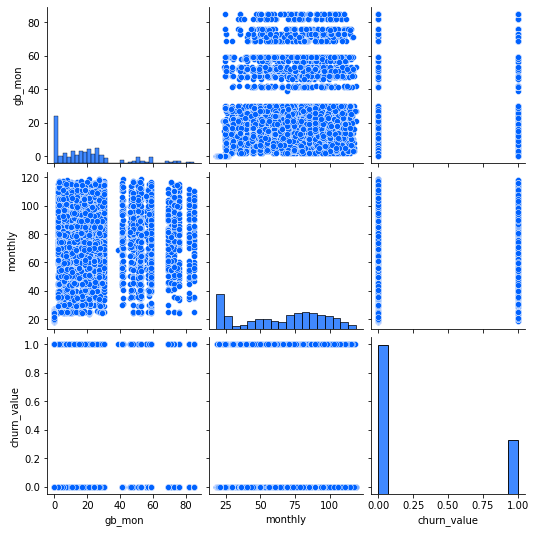

In [11]:
sns.pairplot(churndata[['gb_mon','monthly', 'churn_value']])

Just like in the KNN Lab Demo, let's drop the columns called 'id', 'phone', 'total_revenue', 'cltv' and 'churn_score'. These columns are related to the following information: ID, phone customer status, lifetime value, total revenue and churn score (bank-estimated). Like in the course notebook, we won't be using this information either.

## 3. Preprocessing

#### Drop specific columns 

In [10]:
# This cell was taken from the KNN Demo
df = churndata.drop(columns=['id', 'phone', 'total_revenue', 'cltv', 'churn_score'])

In [11]:
# Check new information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   months         7043 non-null   int64  
 1   offer          7043 non-null   object 
 2   multiple       7043 non-null   object 
 3   internet_type  7043 non-null   object 
 4   gb_mon         7043 non-null   int64  
 5   security       7043 non-null   object 
 6   backup         7043 non-null   object 
 7   protection     7043 non-null   object 
 8   support        7043 non-null   object 
 9   unlimited      7043 non-null   object 
 10  contract       7043 non-null   object 
 11  paperless      7043 non-null   object 
 12  payment        7043 non-null   object 
 13  monthly        7043 non-null   float64
 14  satisfaction   7043 non-null   int64  
 15  churn_value    7043 non-null   int64  
dtypes: float64(1), int64(4), object(11)
memory usage: 935.4+ KB


#### Inspection 

In [7]:
# Let's explore the new DataFrame
df.head()

,months,offer,multiple,internet_type,gb_mon,security,backup,protection,support,unlimited,contract,paperless,payment,monthly,satisfaction,churn_value
0,1,None,No,DSL,8,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,3,1
1,8,Offer E,Yes,Fiber Optic,17,No,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,3,1
2,18,Offer D,Yes,Fiber Optic,52,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,2,1
3,25,Offer C,No,Fiber Optic,12,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2,1
4,37,Offer C,Yes,Fiber Optic,14,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2,1


In [8]:
# Description of the new DataFrame
round(df.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,32.387,24.542,1.00,9.0,29.00,55.00,72.00
gb_mon,7043.0,20.515,20.419,0.00,3.0,17.00,27.00,85.00
monthly,7043.0,64.762,30.090,18.25,35.5,70.35,89.85,118.75
satisfaction,7043.0,3.245,1.202,1.00,3.0,3.00,4.00,5.00
churn_value,7043.0,0.265,0.442,0.00,0.0,0.00,1.00,1.00


In [9]:
# Similarly, let's include the object data types in our description
df.describe(include='object').T

,count,unique,top,freq
offer,7043,6,None,3877
multiple,7043,2,No,4072
internet_type,7043,4,Fiber Optic,3035
security,7043,2,No,5024
backup,7043,2,No,4614
protection,7043,2,No,4621
support,7043,2,No,4999
unlimited,7043,2,Yes,4745
contract,7043,3,Month-to-Month,3610
paperless,7043,2,Yes,4171


#### Unique values 

Like in the demo, let's now preprocess variables based on whether these are 1) binary, 2) categorical but not ordinal, 3) categorical and ordinal and 4) numeric. We'll follow the same steps of the demo. 

In [10]:
# This code cell was adapted from the KNN Demo (first: identify unique values per column)
unique_values = pd.DataFrame([ [i, len(df[i].unique()) ] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
unique_values

,Unique Values
Variable,
months,72
offer,6
multiple,2
internet_type,4
gb_mon,50
security,2
backup,2
protection,2
support,2


#### Binary variables 

Let's start by first identifying the binary variables.

In [11]:
# The following cell was adapted from the KNN Demo
unique_values[unique_values['Unique Values'] == 2]

,Unique Values
Variable,
multiple,2
security,2
backup,2
protection,2
support,2
unlimited,2
paperless,2
churn_value,2


In [12]:
# Let's store the name of the binary variables in a list, just like in the KNN Demo (this cell was also adapted from the demo).
binary_variables_list = list(unique_values[unique_values['Unique Values'] == 2].index)
binary_variables_list

['multiple',
 'security',
 'backup',
 'protection',
 'support',
 'unlimited',
 'paperless',
 'churn_value']

#### Categorical variables 

Next, let's gather the names of the categorical variables. For this, let's use the same criterion as the one used in the KNN Demo.

In [13]:
# This cell was adapted from the KNN Demo.
unique_values[(6 >= unique_values['Unique Values']) & (unique_values['Unique Values'] > 2)]

,Unique Values
Variable,
offer,6
internet_type,4
contract,3
payment,3
satisfaction,5


In [14]:
# This cell was also adapted from the KNN Demo.
categorical_variables_list = list(unique_values[(6 >= unique_values['Unique Values']) & (unique_values['Unique Values'] > 2)].index)
categorical_variables_list

['offer', 'internet_type', 'contract', 'payment', 'satisfaction']

#### Ordinal variables 

Like in the KNN Demo, let's inspect in a bit more detail the values of the categorical variables list to identify the ordinal ones. 

In [15]:
# This cell was adapted from the KNN Demo.
[[i, list(df[i].unique())] for i in categorical_variables_list]

[['offer', ['None', 'Offer E', 'Offer D', 'Offer C', 'Offer B', 'Offer A']],
 ['internet_type', ['DSL', 'Fiber Optic', 'Cable', 'None']],
 ['contract', ['Month-to-Month', 'One Year', 'Two Year']],
 ['payment', ['Bank Withdrawal', 'Credit Card', 'Mailed Check']],
 ['satisfaction', [3, 2, 1, 4, 5]]]

As we can see, based on the values of the categorical variables above, 'contract' and 'satisfaction' can be treated as ordinal variables (as seen in the KNN Demo as well).

Also, the variable 'months' can be treated as an ordinal variable. Let's append it to the list we'll create below, just like in the KNN Demo.

In [16]:
# This cell was adapted from the KNN Demo.
ordinal_variables_list = ['contract', 'satisfaction']
ordinal_variables_list.append('months')
ordinal_variables_list

['contract', 'satisfaction', 'months']

#### Numeric variables 

Next, we'll use set subtraction to get our numeric variables list, just like in the KNN Demo (these will be the variables we'll treat as numeric in this project).

In [17]:
# This cell was adapted from the KNN Demo (set subtraction).
numeric_variables_list = list(set(df.columns) - set(ordinal_variables_list) - set(categorical_variables_list) - set(binary_variables_list))
numeric_variables_list

['gb_mon', 'monthly']

array([[<AxesSubplot:title={'center':'gb_mon'}>,
        <AxesSubplot:title={'center':'monthly'}>]], dtype=object)

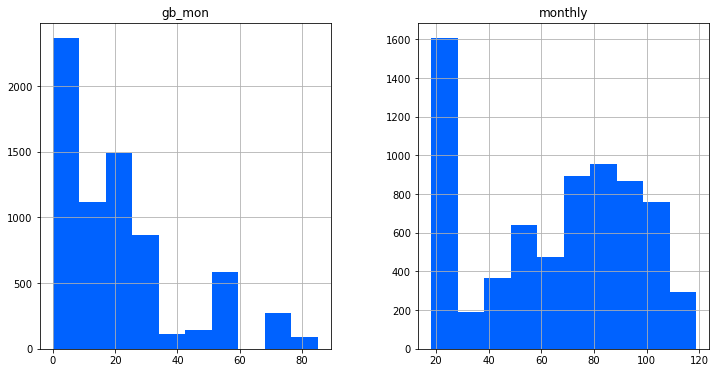

In [18]:
# We can also take a look at their histograms, like in the KNN Demo (this cell was also adapted from that notebook).
df[numeric_variables_list].hist(color=colors[0], figsize=(12, 6))

#### Create bins for the variable 'months' (ordinal) 

In [19]:
# Finally, let's create bins for the variable 'months', like in the KNN Demo.
df['months'] = pd.cut(df['months'], bins=5)

In [20]:
# Let's inspect the variable 'months' now.
df['months']

0       (0.929, 15.2]
1       (0.929, 15.2]
2        (15.2, 29.4]
3        (15.2, 29.4]
4        (29.4, 43.6]
            ...      
7038     (57.8, 72.0]
7039     (15.2, 29.4]
7040     (57.8, 72.0]
7041    (0.929, 15.2]
7042     (57.8, 72.0]
Name: months, Length: 7043, dtype: category
Categories (5, interval[float64]): [(0.929, 15.2] < (15.2, 29.4] < (29.4, 43.6] < (43.6, 57.8] < (57.8, 72.0]]

In [21]:
# Let's take a closer look at the bins.
df['months'].unique()

[(0.929, 15.2], (15.2, 29.4], (29.4, 43.6], (57.8, 72.0], (43.6, 57.8]]
Categories (5, interval[float64]): [(0.929, 15.2] < (15.2, 29.4] < (29.4, 43.6] < (43.6, 57.8] < (57.8, 72.0]]

#### Encoding ordinal variables 

Next, just like in the KNN Demo, let's focus on encoding and scaling the data. We'll follow the same steps from the demo here.

In [23]:
# This code cell was adapted from the KNN Demo.
# Let's treat 
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
lb, le = LabelBinarizer(), LabelEncoder()
for column in ordinal_variables_list:
    df[column] = le.fit_transform(df[column])

In [29]:
# Let's take a look at one of our ordinal variables
#df['months']
#df['contract']
df['satisfaction']

0       2
1       2
2       1
3       1
4       1
       ..
7038    4
7039    2
7040    3
7041    3
7042    3
Name: satisfaction, Length: 7043, dtype: int64

#### Encoding binary variables 

In [33]:
# Let's also encode the binary variables, just like in the demo (this code cell was also adapted from it).
for column in binary_variables_list:
    df[column] = lb.fit_transform(df[column])

In [34]:
# Let's take a look at one of our binary variables now
df['multiple']

0       0
1       1
2       1
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: multiple, Length: 7043, dtype: int32

#### Encoding other categorical variables 

In [38]:
# This code cell was adapted from the KNN Demo
# 'contract' and 'satisfaction' are part of our ordinal_variables_list
categorical_variables_list = list(set(categorical_variables_list) - set(ordinal_variables_list))
df = pd.get_dummies(df, columns = categorical_variables_list, drop_first=True)

In [40]:
categorical_variables_list

['internet_type', 'payment', 'offer']

#### Inspecting our data set  

Let's take a look at the current state of our data set.

In [39]:
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,payment_Credit Card,payment_Mailed Check,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0,0,8,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,1,17,0,1,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
2,1,1,52,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1,0,12,0,1,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,2,1,14,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0


In [41]:
df.dtypes

months                         int32
multiple                       int32
gb_mon                         int64
security                       int32
backup                         int32
protection                     int32
support                        int32
unlimited                      int32
contract                       int32
paperless                      int32
monthly                      float64
satisfaction                   int64
churn_value                    int32
internet_type_DSL              uint8
internet_type_Fiber Optic      uint8
internet_type_None             uint8
payment_Credit Card            uint8
payment_Mailed Check           uint8
offer_Offer A                  uint8
offer_Offer B                  uint8
offer_Offer C                  uint8
offer_Offer D                  uint8
offer_Offer E                  uint8
dtype: object

#### Scaling numerical and ordinal variables 

Let's now use MinMaxScaler() like in the KNN Demo to scale our numerical and ordinal variables. 

In [42]:
# This code cell was adapted from the KNN demo.
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
for column in [ordinal_variables_list + numeric_variables_list]:
    df[column] = mm.fit_transform(df[column])

#### Inspecting our data set 

In [6]:
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,payment_Credit Card,payment_Mailed Check,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,1,0,0,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,0,1,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,1,0,0,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,1,0,0,0,0,0,1,0,0


In [5]:
df.dtypes

months                       float64
multiple                       int64
gb_mon                       float64
security                       int64
backup                         int64
protection                     int64
support                        int64
unlimited                      int64
contract                     float64
paperless                      int64
monthly                      float64
satisfaction                 float64
churn_value                    int64
internet_type_DSL              int64
internet_type_Fiber Optic      int64
internet_type_None             int64
payment_Credit Card            int64
payment_Mailed Check           int64
offer_Offer A                  int64
offer_Offer B                  int64
offer_Offer C                  int64
offer_Offer D                  int64
offer_Offer E                  int64
dtype: object

In [4]:
# This code cell was adapted from the KNN Demo.
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.43,0.40,0.0,0.00,0.25,0.75,1.0
multiple,7043.0,0.42,0.49,0.0,0.00,0.00,1.00,1.0
gb_mon,7043.0,0.24,0.24,0.0,0.04,0.20,0.32,1.0
security,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
backup,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
protection,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
support,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
unlimited,7043.0,0.67,0.47,0.0,0.00,1.00,1.00,1.0
contract,7043.0,0.38,0.42,0.0,0.00,0.00,1.00,1.0
paperless,7043.0,0.59,0.49,0.0,0.00,1.00,1.00,1.0


In [3]:
df.shape

(7043, 23)

In [46]:
# Save a copy of the processed data set
# This code cell was adapted from the KNN Demo as well.
outputfile = 'churndata_processed_project.csv'
df.to_csv(outputfile, index=False)

#### Load the data set back 

In [3]:
df = pd.read_csv('churndata_processed_project.csv')

## 4. Train/test sets

Let's now obtain a train and test set. We'll follow the steps from the KNN Demo again.

In [5]:
# Let's start by importing some modules we'll require (also used in the KNN Demom)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score

In [6]:
# This code cell was adapted from the KNN Demo.
X, y = df.drop(columns='churn_value'), df['churn_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

In [10]:
# Check proportions
df['churn_value'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn_value, dtype: float64

In [11]:
y_train.value_counts(normalize=True)

0    0.734675
1    0.265325
Name: churn_value, dtype: float64

In [12]:
y_test.value_counts(normalize=True)

0    0.734564
1    0.265436
Name: churn_value, dtype: float64

In [7]:
# Check shapes
print(X_train.shape)
print(X_test.shape)

(4225, 22)
(2818, 22)


## 5. KNN model 

Let's now look for a KNN model. We'll follow the same approach from the demo and start by looking for a good value of K. For this, we'll also use weights='distance' for the KNN Classifier, just like in the demo.

#### Search for a good value of K 

In [86]:
# This code cell was adapted from the KNN Demo. We've added the precision and recall values here.
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy
precision_values = list()
recall_values = list() 

for k in range(1, (max_k)+1):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test) 
    
    # In the future, it would be better to use a validation set to compare the models and later evaluate on a separate test set.
    f1_scores.append((k, round(f1_score(y_test, y_pred), 3)))
    
    error = 1-round(accuracy_score(y_test, y_pred), 3)
    error_rates.append((k, error))
    
    precision_values.append((k, round(precision_score(y_test, y_pred), 3)))
    
    recall_values.append((k, round(recall_score(y_test, y_pred), 3)))
    
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])
precision_results = pd.DataFrame(precision_values, columns=['K','Precision'])
recall_results = pd.DataFrame(recall_values, columns=['K','Recall'])

#### Plot results 

<Figure size 1800x1200 with 0 Axes>

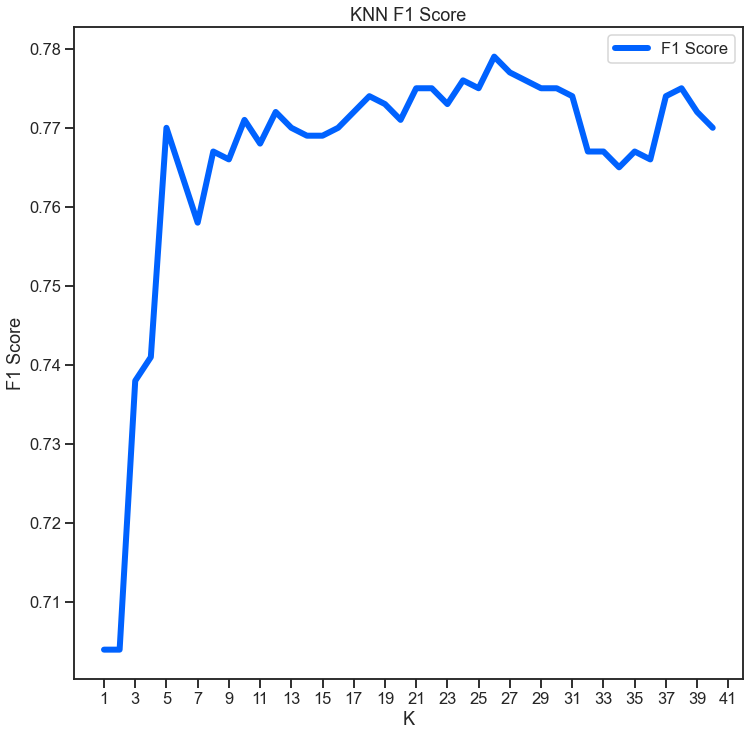

In [87]:
# This code cell was adapted from the KNN Demo.
# F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(color=colors[0], figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k+2, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

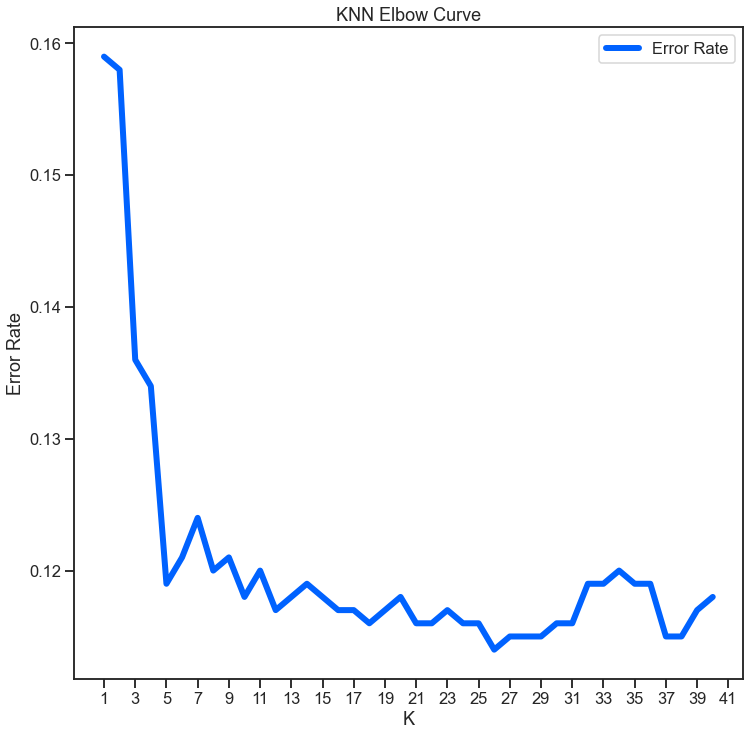

In [88]:
# This code cell was adapted from the KNN Demo.
# Error results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(color=colors[0], figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k+2, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')

<Figure size 1800x1200 with 0 Axes>

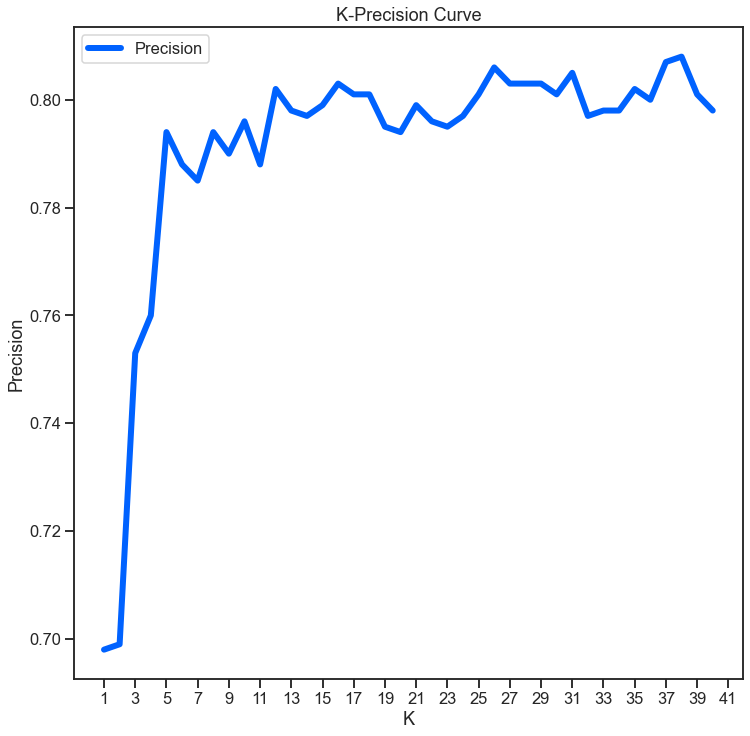

In [89]:
# This code cell was adapted from the KNN Demo.
# Precision results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = precision_results.set_index('K').plot(color=colors[0], figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Precision')
ax.set_xticks(range(1, max_k+2, 2))
plt.title('K-Precision Curve')
plt.savefig('knn_precision.png')

<Figure size 1800x1200 with 0 Axes>

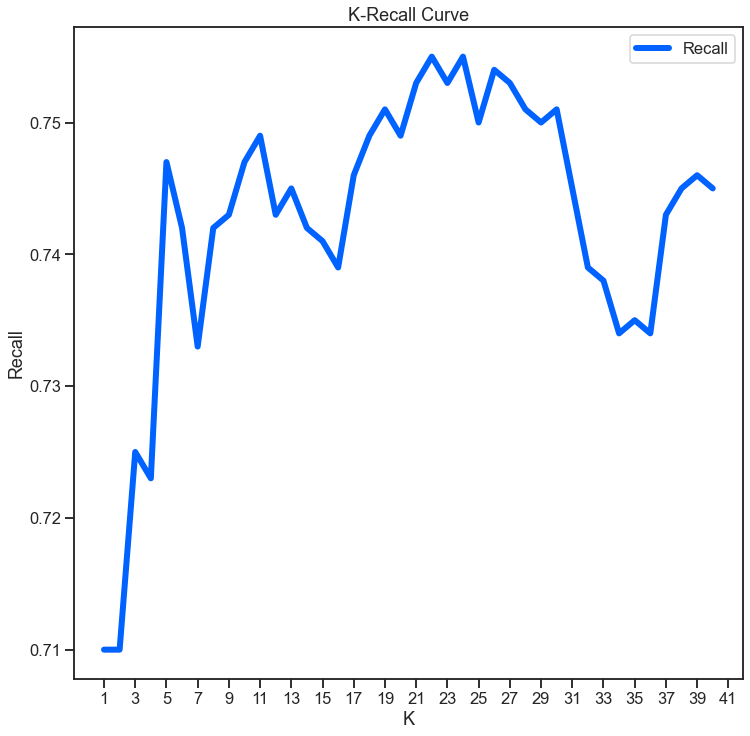

In [90]:
# This code cell was adapted from the KNN Demo.
# Recall results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = recall_results.set_index('K').plot(color=colors[0], figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Recall')
ax.set_xticks(range(1, max_k+2, 2))
plt.title('K-Recall Curve')
plt.savefig('knn_recall.png')

#### Train a KNN model

Based on the plots, we'll use a value of K = 26.

In [91]:
# Let's train our classifier.
knn_26 = KNeighborsClassifier(n_neighbors=26, weights='distance')
knn_26 = knn.fit(X_train, y_train)
y_pred = knn_26.predict(X_test) 

#### Classification report

In [92]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2070
           1       0.80      0.74      0.77       748

    accuracy                           0.88      2818
   macro avg       0.85      0.84      0.85      2818
weighted avg       0.88      0.88      0.88      2818



In [93]:
# Let's also get the metrics by separate just for verification purposes
print(round(accuracy_score(y_test,y_pred),2))
print(round(precision_score(y_test,y_pred),2))
print(round(recall_score(y_test,y_pred),2))

0.88
0.8
0.74


#### Save the model 

In [ ]:
# Let's save the model using pickle
import pickle
name = "../models/knn_26.sav"
pickle.dump(knn_26, open(name, 'wb'))

#### Load the model back 

In [95]:
knn_26 = pickle.load(open(name, 'rb'))

#### Sanity checks 

In [96]:
# Let's also get the metrics by separate just for verification purposes
y_pred = knn_26.predict(X_test)
print(round(accuracy_score(y_test,y_pred),2))
print(round(precision_score(y_test,y_pred),2))
print(round(recall_score(y_test,y_pred),2))

0.88
0.8
0.74


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2070
           1       0.80      0.74      0.77       748

    accuracy                           0.88      2818
   macro avg       0.85      0.84      0.85      2818
weighted avg       0.88      0.88      0.88      2818



#### Confusion matrix 

Let's plot the confusion matrix, just like in the KNN Demo. 

Text(0.5, 76.5, 'Prediction')

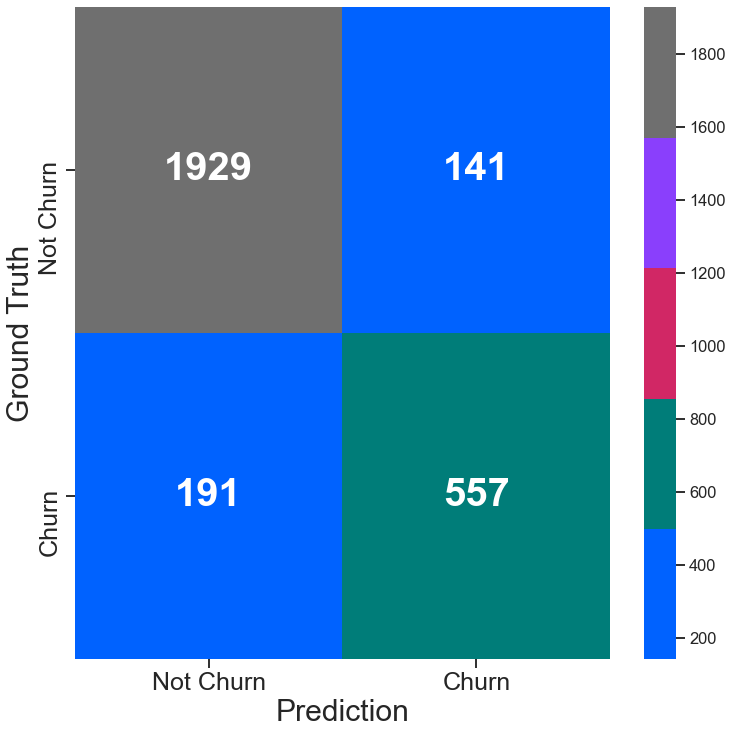

In [98]:
# This code cell was adapted from the KNN Demo.
sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['Not Churn', 'Churn']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Ground Truth', fontsize=30);
ax.set_xlabel('Prediction', fontsize=30)

#### Precision/recall curve 

In [103]:
y_pred_proba = knn_23.predict_proba(X_test)
y_pred_proba[:,1]

array([0.      , 1.      , 0.      , ..., 0.962236, 0.      , 1.      ])

[Text(0.5, 0, 'Recall'),
 Text(0, 0.5, 'Precision'),
 (-0.01, 1.01),
 (-0.01, 1.01),
 Text(0.5, 1.0, 'Precision-Recall curve')]

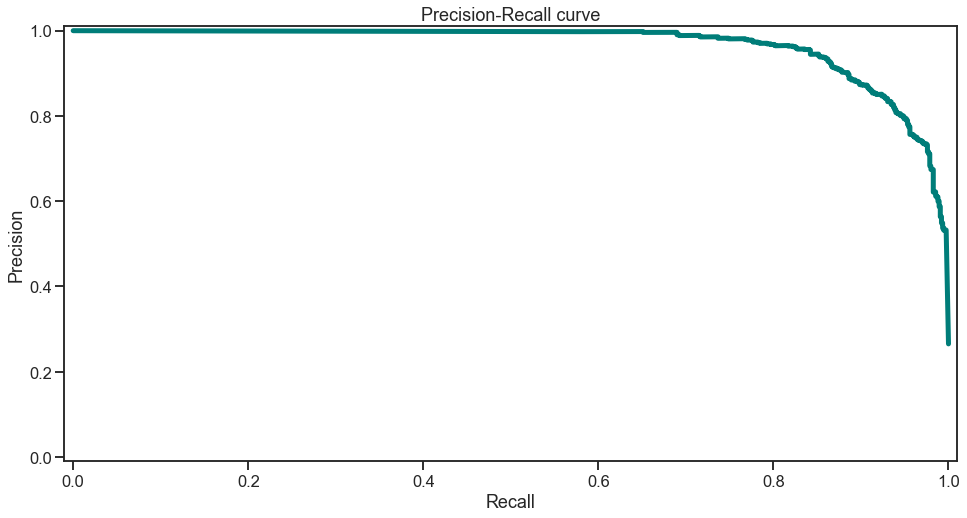

In [107]:
# The following code was adapted from the Bagging Demo ((c) IBM 2020)
from sklearn.metrics import precision_recall_curve
sns.set_context('talk')
_, ax = plt.subplots(figsize=(16,8))

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')

## 6. Random Forest model  

Let's now fit a Random Forest classifier on the data. We'll follow the steps from the Bagging Demo ((c) 2020 IBM).

In [7]:
# This code cell was adapted from the Bagging Demo.
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

#### OOB (Out-of-Bag) Error 

In [15]:
# This code cell was adapted from the Bagging Demo as well.
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Number of trees is not yet declared here.
# bootstrap is True by default.
RF = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True,n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.060118
20.0,0.056331
30.0,0.054675
40.0,0.051834
50.0,0.052308
100.0,0.051124
150.0,0.051598
200.0,0.050888
250.0,0.050888


Based on the results above, it could be a good idea to choose between 200-300 trees. Let's choose 250.

In [16]:
# This was adapted from the Bagging Demo
RF_model = RF.set_params(n_estimators=250)
y_pred = RF_model.predict(X_test)

#### Classification report 

In [17]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2070
           1       0.94      0.89      0.92       748

    accuracy                           0.96      2818
   macro avg       0.95      0.94      0.94      2818
weighted avg       0.96      0.96      0.96      2818



In [18]:
# Let's also get the metrics by separate just for verification purposes
print(round(accuracy_score(y_test,y_pred),2))
print(round(precision_score(y_test,y_pred),2))
print(round(recall_score(y_test,y_pred),2))

0.96
0.94
0.89


#### Save the model 

In [19]:
# Let's save the model using pickle
import pickle
name = "../models/RF_model_250.sav"
pickle.dump(RF_model, open(name, 'wb'))

#### Load the model 

In [20]:
RF_model = pickle.load(open(name, 'rb'))

#### Sanity checks 

In [21]:
# Let's also get the metrics by separate just for verification purposes
y_pred = RF_model.predict(X_test)
print(round(accuracy_score(y_test,y_pred),2))
print(round(precision_score(y_test,y_pred),2))
print(round(recall_score(y_test,y_pred),2))

0.96
0.94
0.89


In [22]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2070
           1       0.94      0.89      0.92       748

    accuracy                           0.96      2818
   macro avg       0.95      0.94      0.94      2818
weighted avg       0.96      0.96      0.96      2818



#### Confusion matrix 

In [30]:
# This code cell was adapted from the KNN Demo (it was put into a function)
def plot_confusion_matrix():
    sns.set_palette(sns.color_palette(colors))
    _, ax = plt.subplots(figsize=(12,12))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
    labels = ['Not Churn', 'Churn']
    ax.set_xticklabels(labels, fontsize=25);
    ax.set_yticklabels(labels, fontsize=25);
    ax.set_ylabel('Ground Truth', fontsize=30);
    ax.set_xlabel('Prediction', fontsize=30)

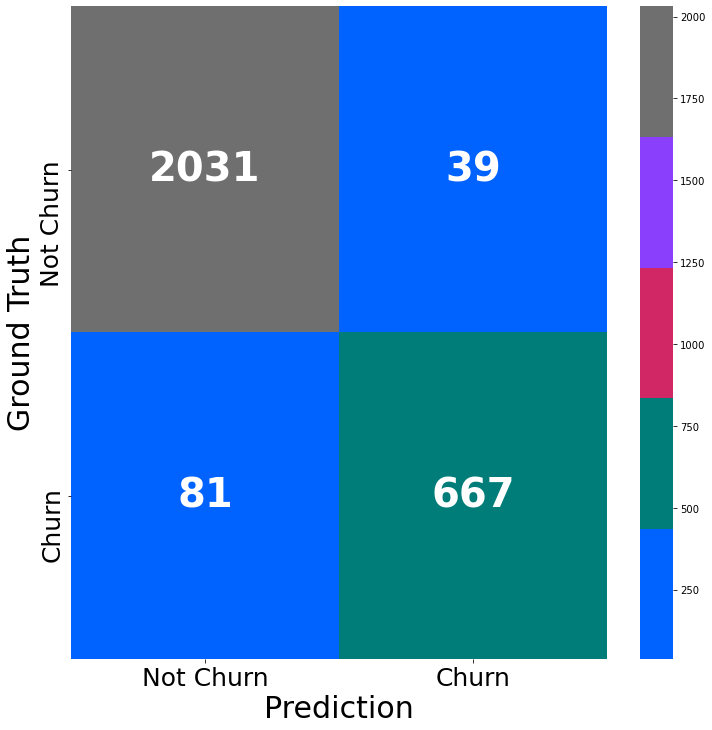

In [31]:
plot_confusion_matrix()

#### Precision/recall curve 

In [24]:
y_pred_proba = RF_model.predict_proba(X_test)
y_pred_proba[:,1]

array([0.0075 , 0.97625, 0.385  , ..., 0.99625, 0.015  , 0.9475 ])

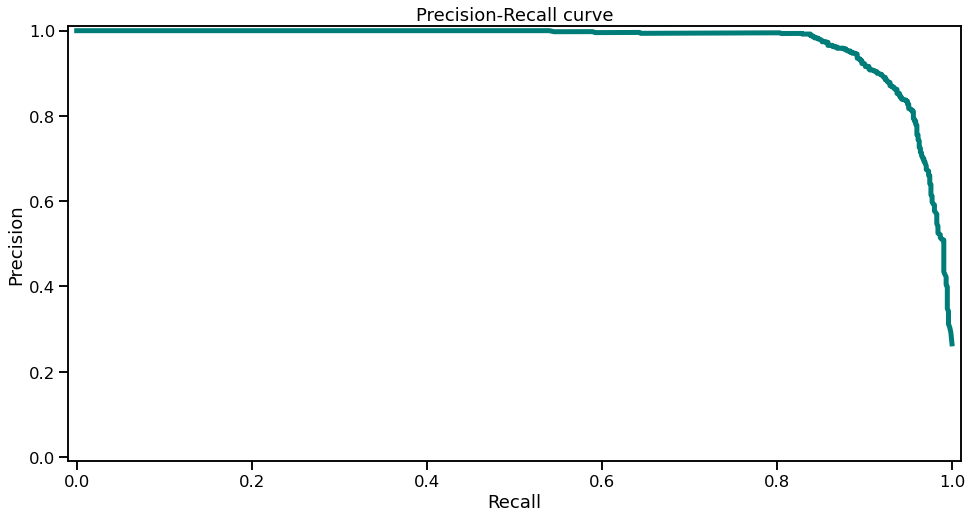

In [32]:
# The following code was adapted from the Bagging Demo ((c) IBM 2020) -> can be put in a function
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve():
    sns.set_context('talk')
    _, ax = plt.subplots(figsize=(16,8))

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:,1])
    ax.plot(recall, precision, color=colors[1], linewidth=5)
    ax.set(xlabel='Recall', ylabel='Precision',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='Precision-Recall curve')
    
plot_precision_recall_curve()

#### Feature importances

In [33]:
RF_model.feature_importances_

array([0.05258021, 0.01047412, 0.06374422, 0.02096175, 0.01083254,
       0.00951104, 0.01210912, 0.00890383, 0.07815275, 0.01349785,
       0.08951171, 0.5401034 , 0.00653259, 0.02197942, 0.00805218,
       0.01676456, 0.00482623, 0.00166297, 0.00481088, 0.00424666,
       0.00611975, 0.01462223])

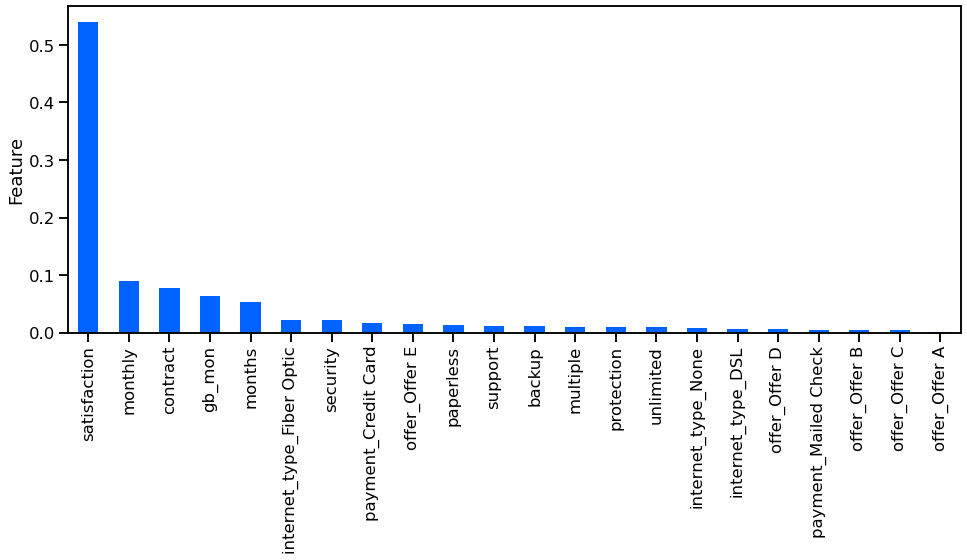

In [34]:
# Plot feature importances (this code cell was adapted from the Bagging Demo by IBM)
feature_cols = [x for x in df.columns if x != 'churn_value']
feature_imp = pd.Series(RF_model.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');

## 7. Extra Random Trees model 

Let's now try developing an Extra Trees Classifier. We'll follow the steps from the Bagging Demo again.

In [35]:
# This code cell was adapted from the Bagging Demo by IBM.
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
EF = ExtraTreesClassifier(oob_score=True, random_state=42, warm_start=True, bootstrap=True, n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.077633
20.0,0.069822
30.0,0.066036
40.0,0.066509
50.0,0.062959
100.0,0.059172
150.0,0.056568
200.0,0.056095
250.0,0.053491


In [36]:
# Combine the data frames to compare the random forest and extra trees classifier
# This code cell was also adapted from the Bagging Demo
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.060118,0.077633
20.0,0.056331,0.069822
30.0,0.054675,0.066036
40.0,0.051834,0.066509
50.0,0.052308,0.062959
100.0,0.051124,0.059172
150.0,0.051598,0.056568
200.0,0.050888,0.056095
250.0,0.050888,0.053491


The Random Forest algorithm seems to be doing better in comparison to the Extra Random Trees one. For the Extra Trees, based on the previous results, a good idea could be between 600-750 trees. Let's choose 600 to make it less complex. 

In [37]:
EF_model = EF.set_params(n_estimators=600)
y_pred = EF_model.predict(X_test)

In [41]:
# Note that it's different, but close to the values from before
1- EF_model.oob_score_

0.052544378698224814

#### Classification report

In [42]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2070
           1       0.92      0.89      0.91       748

    accuracy                           0.95      2818
   macro avg       0.94      0.93      0.94      2818
weighted avg       0.95      0.95      0.95      2818



In [43]:
# Let's also get the metrics by separate just for verification purposes
print(round(accuracy_score(y_test,y_pred),2))
print(round(precision_score(y_test,y_pred),2))
print(round(recall_score(y_test,y_pred),2))

0.95
0.92
0.89


#### Save the model

In [44]:
import pickle
name = "../models/EF_model_600.sav"
pickle.dump(EF_model, open(name, 'wb'))

#### Load the model 

In [45]:
EF_model = pickle.load(open(name, 'rb'))

#### Sanity checks 

In [47]:
y_pred = EF_model.predict(X_test)
print(round(accuracy_score(y_test,y_pred),2))
print(round(precision_score(y_test,y_pred),2))
print(round(recall_score(y_test,y_pred),2))

0.95
0.92
0.89


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2070
           1       0.92      0.89      0.91       748

    accuracy                           0.95      2818
   macro avg       0.94      0.93      0.94      2818
weighted avg       0.95      0.95      0.95      2818



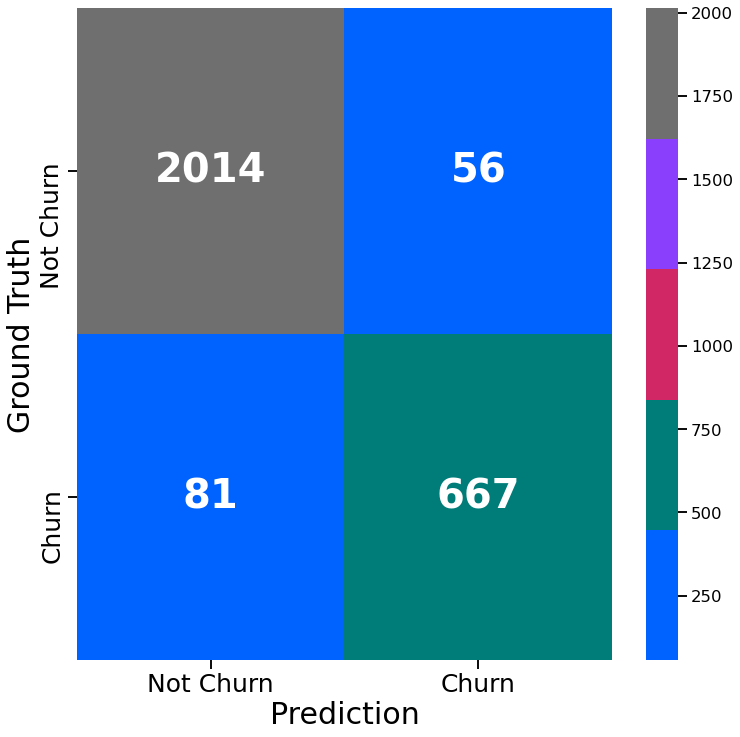

In [49]:
plot_confusion_matrix()

#### Precision/recall curve 

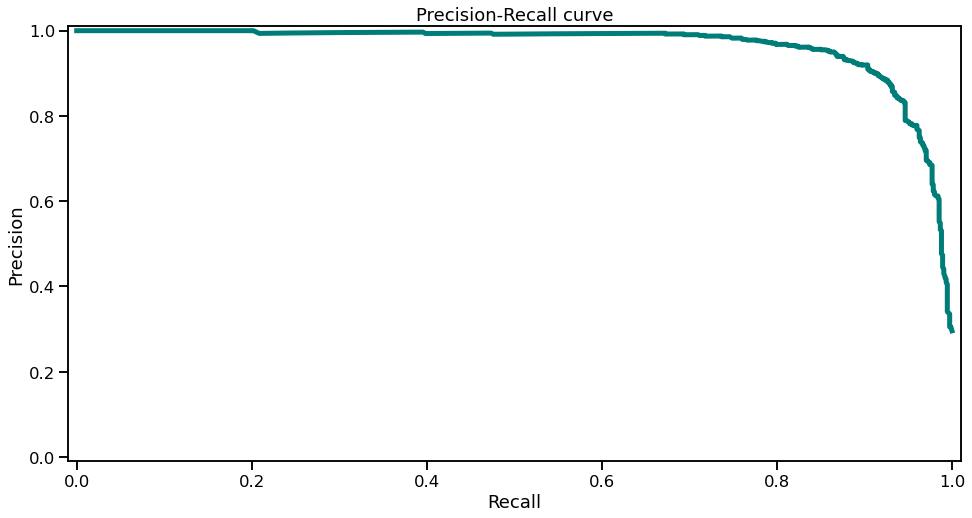

In [50]:
y_pred_proba = EF_model.predict_proba(X_test)
y_pred_proba[:,1]
plot_precision_recall_curve()

#### Feature importances 

In [51]:
EF_model.feature_importances_

array([0.05764663, 0.0160425 , 0.04988871, 0.03146271, 0.01736324,
       0.01522884, 0.0182028 , 0.01369652, 0.09298205, 0.02079262,
       0.06750947, 0.45959541, 0.01066958, 0.03475825, 0.01573933,
       0.02422249, 0.00729659, 0.00313942, 0.00808905, 0.00630331,
       0.00892082, 0.02044966])

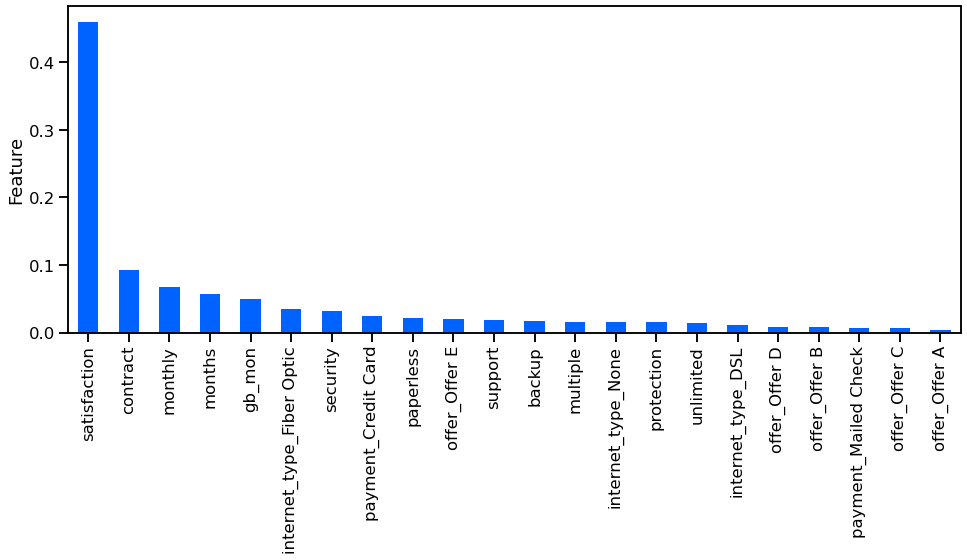

In [52]:
# Plot feature importances (this code cell was adapted from the Bagging Demo by IBM)
# It can also be put into a function
feature_cols = [x for x in df.columns if x != 'churn_value']
feature_imp = pd.Series(EF_model.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');